### 1. Laden Sie die Trainingsdaten.

In [163]:
import pandas as pd
# Trainingsdaten aus csv laden, der seperator ist hier allerdings ein ';'
data_train = pd.read_csv("./data/project/train.csv", sep=";")

In [164]:
# warum geben wir head aus? 
data_train.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0


#### 2. Führen Sie eine kurze EDA durch (Details auf Slide 14).

       transactionId                                   basket customerType  \
15646     1149900054  [4, 0, 4, 4, 3, 4, 0, 4, 4, 4, 4, 4, 2]     existing   

       totalAmount returnLabel  
15646       1976.0    returned  


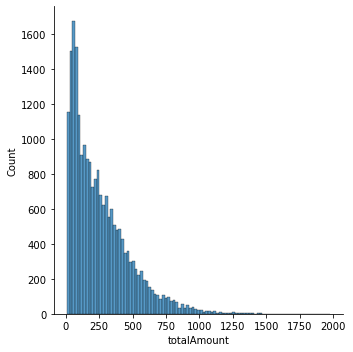

In [165]:
# Was wird für EDA benötigt? Was ist überhaupt EDA


import seaborn as sns

plotable_date = data_train

plotable_date['returnLabel'] = plotable_date['returnLabel'].replace({0:'bought',1:'returned'});


print(plotable_date[plotable_date['totalAmount'] == plotable_date['totalAmount'].max()])

# histogram für 'customerType' 
plotable_date['customerType'].value_counts().plot(kind='bar')

# histogram für 'totalAmount' 
plotable_date.hist(column='totalAmount')

# verteilung von returnLabel als plot
plotable_date['returnLabel'].value_counts().plot(kind='bar')

# return label in abhängigkeit von customerType plotten
plotable_date[['returnLabel','customerType']].value_counts().plot.bar(rot=0,figsize=(10,5))

# TODO Comment 
plotable_date.boxplot(column='totalAmount', by='returnLabel',figsize=(3,5))

sns.displot(plotable_date['totalAmount'])


#### 3. Füllen Sie fehlende Werte in den Trainingsdaten auf.

In [166]:
# warum füllen wir die ausgewählten trainingsdaten auf und nicht die andern?

print(data_train.isnull().sum())
data_train['totalAmount'].fillna(data_train['totalAmount'].mean(), inplace=True)

transactionId      0
basket             0
customerType     442
totalAmount      477
returnLabel        0
dtype: int64
existing


#### 4. Transformieren Sie die kategorischen Features mittels One-hot-encoding.

In [167]:
# Warum one hot encoden wir diese daten und nicht andere

data_train.head()
is_customer = data_train['customerType'].replace({'existing': 1, 'new': 0})
data_train['is_customer'] = is_customer
data_train.drop(['customerType'], axis=1, inplace=True)
was_returned = data_train['returnLabel'].replace({'bought': 0, 'returned': 1})
data_train['was_returned'] = was_returned
data_train.drop(['returnLabel'], axis=1, inplace=True)
data_train.head()

,transactionId,basket,totalAmount,is_customer,was_returned
0,9534310106,"[4, 3, 4]",252.0,0,1
1,7202594767,"[4, 2, 0, 2, 5]",70.0,1,0
2,2737331698,[5],84.0,1,0
3,4868011733,"[1, 4, 2, 4]",116.0,1,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,1,0


#### 5. Versuchen Sie auf Basis des Attributs basket Features zu bauen (z.B. wie oft kommt jede Kategorie im Basket vor)

In [168]:
# warum nutzten wir diese feature, was könnte man noch für feature benutzen? => warum haben wir sie nicht benutzt?

data_train['zero_count'] = data_train.basket.map(lambda x: x.count('0'))
data_train['one_count'] = data_train.basket.map(lambda x: x.count('1'))
data_train['two_count'] = data_train.basket.map(lambda x: x.count('2'))
data_train['three_count'] = data_train.basket.map(lambda x: x.count('3'))
data_train['four_count'] = data_train.basket.map(lambda x: x.count('4'))
data_train['five_count'] = data_train.basket.map(lambda x: x.count('5'))
data_train.drop(['basket'], axis=1, inplace=True)
data_train.head()


,transactionId,totalAmount,is_customer,was_returned,zero_count,one_count,two_count,three_count,four_count,five_count
0,9534310106,252.0,0,1,0,0,0,1,2,0
1,7202594767,70.0,1,0,1,0,2,0,1,1
2,2737331698,84.0,1,0,0,0,0,0,0,1
3,4868011733,116.0,1,0,0,1,1,0,2,0
4,7622406570,378.0,1,0,1,0,3,2,0,1


#### 6. Skalieren Sie die Features mit einem StandardScaler.

In [ ]:
import standardScaler as ss

### 7. Trainieren Sie die folgenden Klassifikationsmodelle und probieren Sie die angegebenen Hyperparameter mittels Cross-Validation aus:

##### 7.1. Logistische Regression: C :[0.1,1,4,5,6,10,30,100] und penalty: ["l1", "l2"]

#### 7.2. Random Forest: n_estimators: [60,80,100,120,140] und max_depth: [2, 4, 6]


##### 7.3. Gradient Boosting Tree: gleiche Hyperparameter wie bei Random Forest.

### 8. Laden Sie die Testdaten.

### 9. Entfernen Sie alle Zeilen mit fehlenden Werten.

### 10. Transformieren Sie die Attribute genauso wie bei den Trainingsdaten.

### 11. Skalieren Sie die Daten im gleichem Maß wie die Trainingsdaten.

### 12. Machen Sie eine Vorhersage auf den Testdaten mit allen drei Modellen und den jeweils besten Hyperparametern aus der Cross Validation.

### 13. Berechnen Sie für jedes der drei Modell Accuracy, Precision und Recall.

### 14. Berechnen Sie außerdem die Accuracy auf den Trainingsdaten und vergleichen Sie Accuracy auf Trainings- und Testdaten. Liegt Overfitting vor?

### 15. Untersuchen Sie wieviele Datenpunkte es in den Testdaten gibt, welche von allen drei Modellen falsch klassifiziert wurden:

#### 1. Bestimmen Sie für jedes der drei Modelle die Indizes der Testdatenpunkte auf welchen das jeweilige Modell falsch klassifiziert hat.

#### 2. Nutzen Sie die set-Klasse in Python um die Anzahl an Datenpunkten zu bestimmen, welche von allen drei Modellen falsch klassifiziert wurden.